## Жерноклеев Дмитрий 
### Домашнее задание 2. 

### Импортируем модули и создадим экземпляр класса Model, с которым будем работать

In [1]:
# !pip install --user BPTK_Py==1.4.2 # более поздние не работают 
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

model = Model(starttime=1.0, stoptime=100.0, dt=1.0, name='ModBass')

### Создадим контейнеры (потенциальных клиентов, клиентов нашей фирмы и клиентов конкурентов)

In [2]:
# stocks
PotentialClients = model.stock("PotentialClients")
Clients = model.stock("Clients")
Compet = model.stock("Compet")

### Введем константы, необходимые для реализации нашей модели. Значения основных параметров взял те же, что были записаны на доске во время занятия.

In [3]:
rate_var = 100.0
eff_wom_var = 0.015
eff_market1_var = 0.011
eff_market2_var = 0.011
k1_var = (eff_market1_var + eff_market2_var) / (eff_market1_var + eff_market2_var + 2 * eff_wom_var)
k2_var = (eff_market1_var + eff_market2_var) / (eff_market1_var + eff_market2_var + 2 * eff_wom_var)
tr1_var = 2 * eff_wom_var / (eff_market1_var + eff_market2_var + 2 * eff_wom_var)
tr2_var = 2 * eff_wom_var / (eff_market1_var + eff_market2_var + 2 * eff_wom_var)
TP_var = 1e5
p_11_var = 0.7
p_13_var = 0.1
p_21_var = 0.1
p_23_var = 0.2
eps = 1e-3

In [4]:
#constants
TP = model.constant("TP") 
eff_market1 = model.constant("eff_market1")
eff_market2 = model.constant("eff_market2")
eff_wom = model.constant("eff_wom")
rate = model.constant("rate")
k1 = model.constant("k1")
k2 = model.constant("k2")
tr1 = model.constant("tr1")
tr2 = model.constant("tr2")
p_11 = model.constant("p_11")
p_13 = model.constant("p_13")
p_21 = model.constant("p_21")
p_23 = model.constant("p_23")

### Создадим также "потоки" и зададим уравнения, связывающие элементы нашей модели

In [5]:
# flows
potentialclients_to_clients = model.flow("potentialclients_to_clients") # 3
potentialclients_to_compet = model.flow("potentialclients_to_compet") # 4

clients_to_potentialclients = model.flow("clients_to_potentialclients") # 5
compet_to_potentialclients = model.flow("compet_to_potentialclients") # 6

clients_to_compet = model.flow("clients_to_compet") # 1
compet_to_clients = model.flow("compet_to_clients") # 2
# цифры от 1 до 6 - номера потоков как на схеме, которая была нарисована в классе
# уравнения ниже также воспроизведены на основании материалов занятия

# equations
potentialclients_to_clients.equation = eff_market1 * PotentialClients + (eff_wom * rate * PotentialClients * Clients * p_11) / (Compet + PotentialClients + Clients) # TP
potentialclients_to_compet.equation = eff_market2 * PotentialClients + (eff_wom * rate * PotentialClients * Compet * p_21) / (Compet + PotentialClients + Clients) # TP

clients_to_potentialclients.equation = Clients * p_13 * k1
compet_to_potentialclients.equation = Compet * p_23 * k2

clients_to_compet.equation = (tr1 * eff_wom * rate * Compet * p_21 * Clients * (1 - p_11 - k1 * p_13)) / (Compet + PotentialClients + Clients) # TP
compet_to_clients.equation = (tr2 * eff_wom * rate * Clients * p_11 * Compet * (1 - p_21 - k2 * p_23)) / (Compet + PotentialClients + Clients) #TP

Clients.equation = potentialclients_to_clients + compet_to_clients - clients_to_potentialclients - clients_to_compet
PotentialClients.equation = clients_to_potentialclients + compet_to_potentialclients - potentialclients_to_clients - potentialclients_to_compet
Compet.equation = potentialclients_to_compet + clients_to_compet - compet_to_clients - compet_to_potentialclients

### Проинициализируем константы и начальные состояния контейнеров

In [6]:
#initialize model
Clients.initial_value = 0.0
Compet.initial_value = 0.0
PotentialClients.initial_value = TP
TP.equation = TP_var
eff_market1.equation = eff_market1_var
eff_market2.equation = eff_market2_var
eff_wom.equation = eff_wom_var
rate.equation = rate_var
k1.equation = k1_var # (eff_market1 + eff_market2) / (eff_market1 + eff_market2 + 2 * eff_wom)
k2.equation = k2_var # (eff_market1 + eff_market2) / (eff_market1 + eff_market2 + 2 * eff_wom)
tr1.equation = tr1_var # 2 * eff_wom / (eff_market1 + eff_market2 + 2 * eff_wom)
tr2.equation = tr2_var # 2 * eff_wom / (eff_market1 + eff_market2 + 2 * eff_wom)
p_11.equation = p_11_var
p_13.equation = p_13_var
p_21.equation = p_21_var
p_23.equation = p_23_var

### Произведем запуск модели и построим графики, отображающие динамику системы

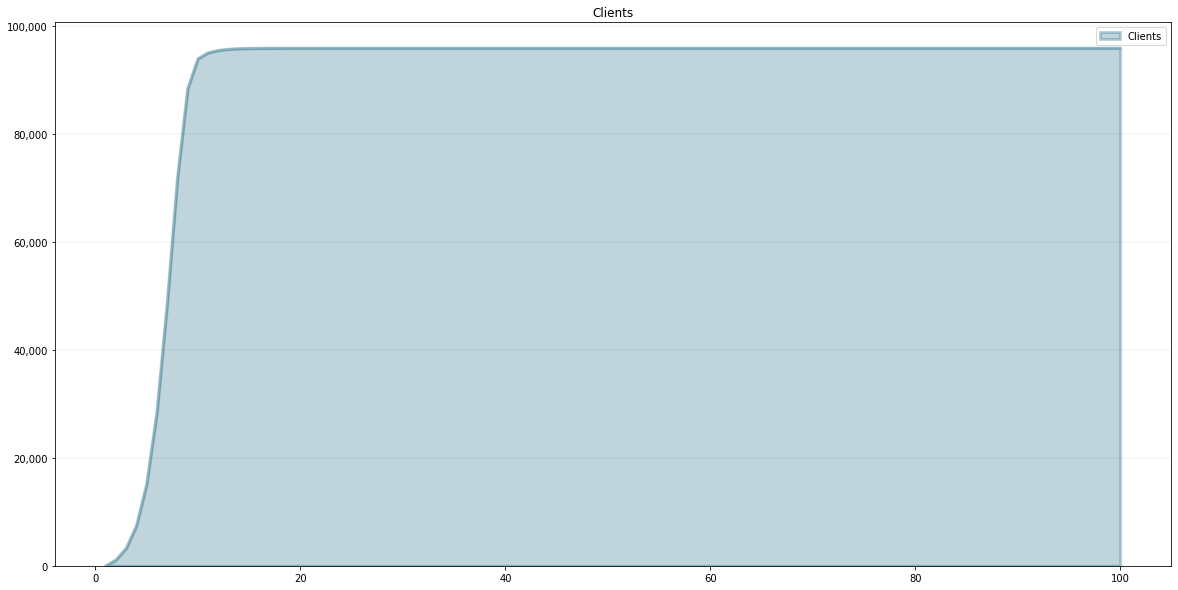

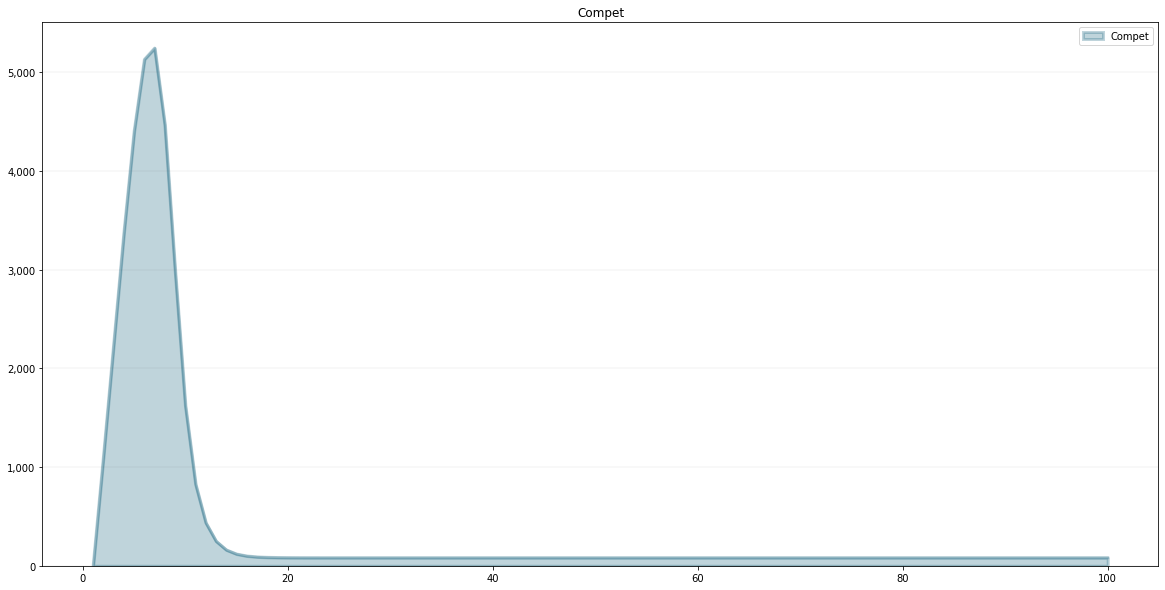

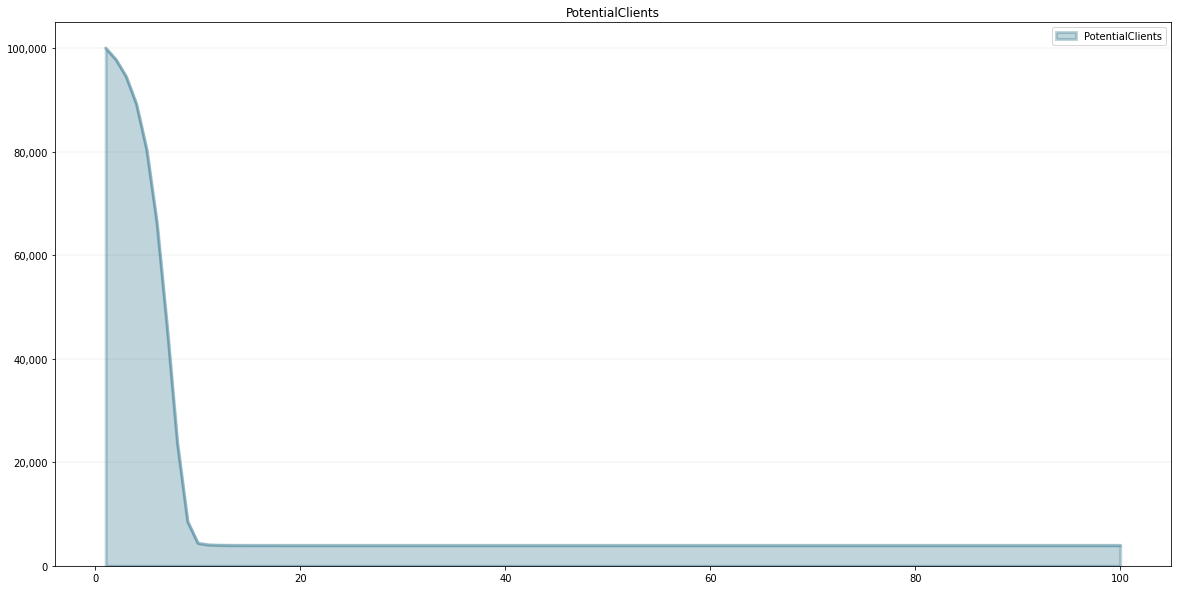

In [7]:
Clients.plot()
Compet.plot()
PotentialClients.plot()

In [8]:
df = Clients.plot(return_df=True).copy()
df['Compet'] = Compet.plot(return_df=True).copy()
df['PotentialClients'] = PotentialClients.plot(return_df=True).copy()
df

,Clients,Compet,PotentialClients
1.0,0.000000,0.000000,100000.000000
2.0,1100.000000,1100.000000,97800.000000
3.0,3264.558317,2238.386298,94497.055385
4.0,7439.531010,3371.269404,89189.199586
5.0,15191.172975,4399.821482,80409.005543
...,...,...,...
96.0,95968.769834,81.767395,3949.462771
97.0,95968.769834,81.767395,3949.462771
98.0,95968.769834,81.767395,3949.462771
99.0,95968.769834,81.767395,3949.462771


In [9]:
df['Clients_diff'] = df['Clients'].diff(1)
df['Compet_diff'] = df['Compet'].diff(1)
df['PotentialClients_diff'] = df['PotentialClients'].diff(1)
df

,Clients,Compet,PotentialClients,Clients_diff,Compet_diff,PotentialClients_diff
1.0,0.000000,0.000000,100000.000000,NaN,NaN,NaN
2.0,1100.000000,1100.000000,97800.000000,1100.000000,1100.000000,-2200.000000
3.0,3264.558317,2238.386298,94497.055385,2164.558317,1138.386298,-3302.944615
4.0,7439.531010,3371.269404,89189.199586,4174.972693,1132.883105,-5307.855798
5.0,15191.172975,4399.821482,80409.005543,7751.641965,1028.552078,-8780.194043
...,...,...,...,...,...,...
96.0,95968.769834,81.767395,3949.462771,0.000000,0.000000,0.000000
97.0,95968.769834,81.767395,3949.462771,0.000000,0.000000,0.000000
98.0,95968.769834,81.767395,3949.462771,0.000000,0.000000,0.000000
99.0,95968.769834,81.767395,3949.462771,0.000000,0.000000,0.000000


In [10]:
df['metrics'] = df['Clients_diff'].abs() + df['Compet_diff'].abs() + df['PotentialClients_diff'].abs()
metric = df['metrics'].iloc[1:].values # слайс, чтобы выкинуть первый NaN
# print(metric)
metric = metric.tolist()

[4.40000000e+03 6.60588923e+03 1.06157116e+04 1.75603881e+04
 2.82210093e+04 4.04341545e+04 4.64067716e+04 3.31729784e+04
 1.10675742e+04 2.22137111e+03 8.98940164e+02 4.30568164e+02
 2.03811431e+02 9.62213967e+01 4.53631024e+01 2.13721707e+01
 1.00660640e+01 4.74031511e+00 2.23215737e+00 1.05106194e+00
 4.94908801e-01 2.33033800e-01 1.09726414e-01 5.16657527e-02
 2.43273055e-02 1.14547366e-02 5.39356763e-03 2.53961052e-03
 1.19579874e-03 5.63052715e-04 2.65118490e-04 1.24833457e-04
 5.87789662e-05 2.76766091e-05 1.30317884e-05 6.13613362e-06
 2.88925364e-06 1.36043045e-06 6.40573660e-07 3.01625903e-07
 1.42023396e-07 6.68762681e-08 3.14871613e-08 1.48205288e-08
 6.98408087e-09 3.28715544e-09 1.54480517e-09 7.28320515e-10
 3.45877993e-10 1.68157044e-10 8.24940116e-11 3.09796633e-11
 2.41016096e-11 3.89377419e-12 2.98427949e-12 7.67386155e-13
 8.24229573e-13 1.08002496e-12 5.25801624e-13 4.83169060e-13
 9.37916411e-13 4.54747351e-13 4.68958206e-13 9.23705556e-13
 0.00000000e+00 0.000000

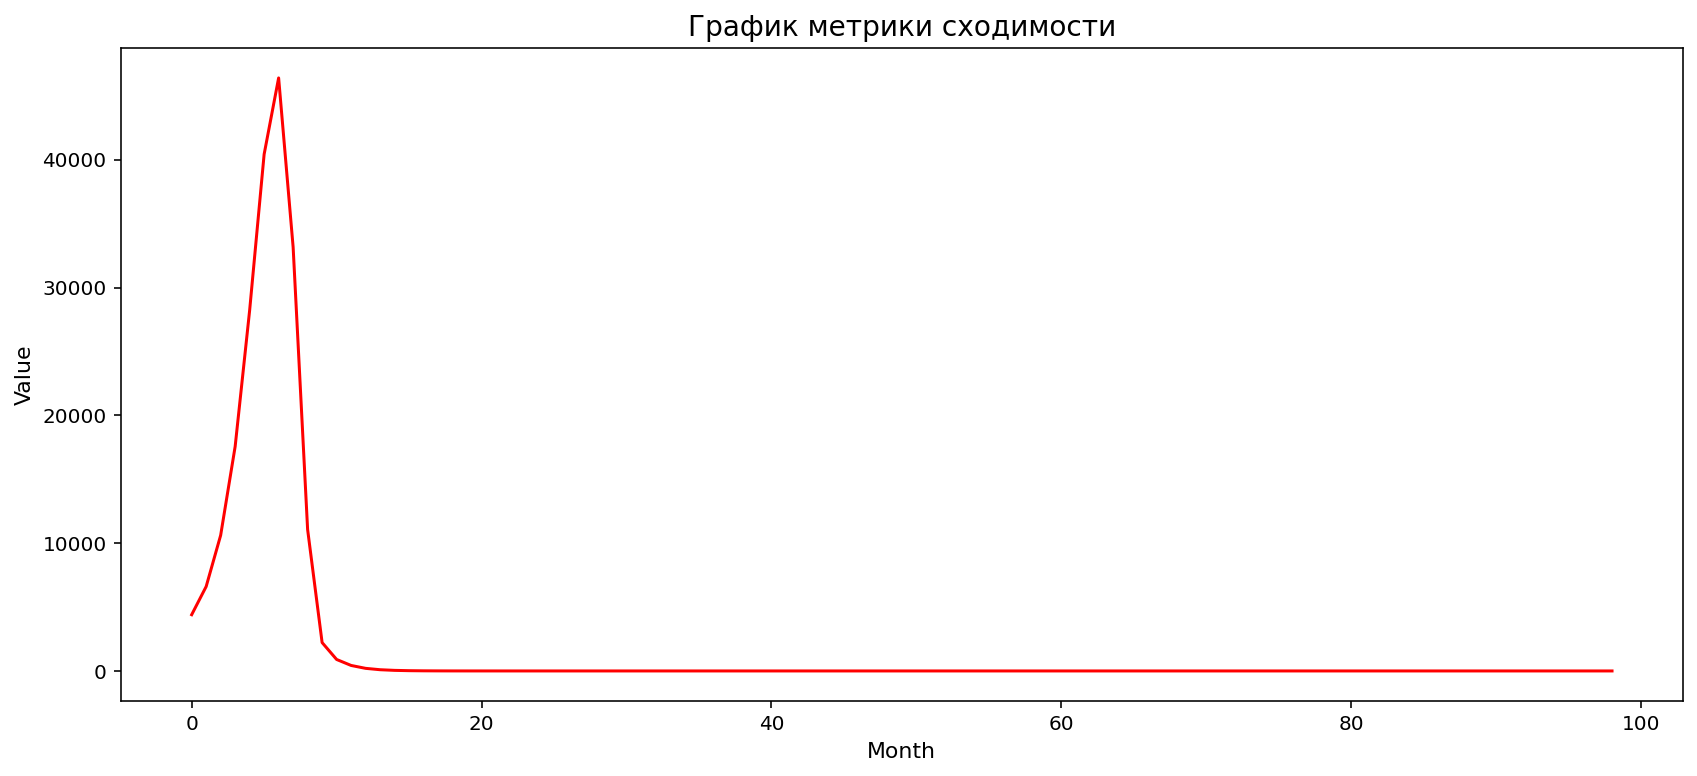

In [11]:
%config InlineBackend.figure_format = 'retina'
# df['metrics'].iloc[1:].plot(figsize=(14, 6), title='График метрики сходимости',
#                             xlabel='Month', ylabel='Value')

plt.figure(figsize=(14, 6))
plt.plot(range(len(metric)), metric, color='r')
plt.xlabel('Month', fontsize=11)
plt.ylabel('Value', fontsize=11)
plt.title('График метрики сходимости', fontsize=14)
plt.show()

### Проверим факт сходимости: мы просуммировали модули первых разностей наших рядов, будем говорить о том, что модель сошлась, если последние 5% значений данной суммы модулей меньше, чем заданное эпсилон 

In [12]:
if np.all(df['metrics'].iloc[1:].apply(lambda x: x < eps).iloc[-int(df.shape[0] * 0.05):].values):
    print('Установлена сходимость модели')
else:
    print('В данном случае сходимость не наблюдается')
    print('Попробуйте увеличить параметр stoptime при инициализации модели в самом начале, возможно, она не успела сойтись!')

Установлена сходимость модели


#### Ремарка: наверное, можно было бы смотреть только на модули одного ряда, но интуитивно кажется, что если модель сошлась (в каком-то смысле) для одного ряда, то она необязательно сошлась для двух других, а просуммировав все три, мы как бы наложили более строгое требование. Ещё, вероятно, возможно проверять сходимость, смотря просто на последнее значение этой суммы модулей, но, как мне кажется, гипотетически возможно, что флуктуации остановились прям перед последним значением, я же стараюсь смотреть на хвост ряда и таким образом, опять же, пытаюсь задать более строгий критерий сходимости.

### Теперь оформим наш код в виде функции, куда мы будем передавать свои доли довольных и недовольных (p11, p13, p21, p23), и с помощью которой сможем нагенерить необходимую выборку

In [13]:
def cyclic_run(stoptime=3000.0, p11=None, p13=None, p21=None, p23=None, rate_var=rate_var, eff_wom_var=eff_wom_var, 
               eff_market1_var=eff_market1_var, eff_market2_var=eff_market2_var, k1_var=k1_var, k2_var=k2_var,
              tr1_var=tr1_var, TP_var=TP_var, eps=eps):
    # если какая-то из p не была передана, то генерим рандомные 
    # с учетом того, что для каждой фирмы они должны суммироваться в единицу
    if any([p11 == None, p13 == None, p21 == None, p23 == None]):
        p11 = np.random.uniform()
        p13 = np.random.uniform(0, 1 - p11)
        p21 = np.random.uniform()
        p23 = np.random.uniform(0, 1 - p21)
        
    model_run = Model(starttime=1.0, stoptime=stoptime, dt=1.0, name='ModBass_Run')
    # stocks
    PotentialClients = model_run.stock("PotentialClients")
    Clients = model_run.stock("Clients")
    Compet = model_run.stock("Compet")
    
    TP = model_run.constant("TP") 
    eff_market1 = model_run.constant("eff_market1")
    eff_market2 = model_run.constant("eff_market2")
    eff_wom = model_run.constant("eff_wom")
    rate = model_run.constant("rate")
    k1 = model_run.constant("k1")
    k2 = model_run.constant("k2")
    tr1 = model_run.constant("tr1")
    tr2 = model_run.constant("tr2")
    p_11 = model_run.constant("p_11")
    p_13 = model_run.constant("p_13")
    p_21 = model_run.constant("p_21")
    p_23 = model_run.constant("p_23")
    
    # flows
    potentialclients_to_clients = model_run.flow("potentialclients_to_clients") # 3
    potentialclients_to_compet = model_run.flow("potentialclients_to_compet") # 4

    clients_to_potentialclients = model_run.flow("clients_to_potentialclients") # 5
    compet_to_potentialclients = model_run.flow("compet_to_potentialclients") # 6

    clients_to_compet = model_run.flow("clients_to_compet") # 1
    compet_to_clients = model_run.flow("compet_to_clients") # 2

    # equations
    potentialclients_to_clients.equation = eff_market1 * PotentialClients + (eff_wom * rate * PotentialClients * Clients * p_11) / (Compet + PotentialClients + Clients) # TP
    potentialclients_to_compet.equation = eff_market2 * PotentialClients + (eff_wom * rate * PotentialClients * Compet * p_21) / (Compet + PotentialClients + Clients) # TP

    clients_to_potentialclients.equation = Clients * p_13 * k1
    compet_to_potentialclients.equation = Compet * p_23 * k2

    clients_to_compet.equation = (tr1 * eff_wom * rate * Compet * p_21 * Clients * (1 - p_11 - k1 * p_13)) / (Compet + PotentialClients + Clients) # TP
    compet_to_clients.equation = (tr2 * eff_wom * rate * Clients * p_11 * Compet * (1 - p_21 - k2 * p_23)) / (Compet + PotentialClients + Clients) #TP

    Clients.equation = potentialclients_to_clients + compet_to_clients - clients_to_potentialclients - clients_to_compet
    PotentialClients.equation = clients_to_potentialclients + compet_to_potentialclients - potentialclients_to_clients - potentialclients_to_compet
    Compet.equation = potentialclients_to_compet + clients_to_compet - compet_to_clients - compet_to_potentialclients
    
    #initialize model
    Clients.initial_value = 0.0
    Compet.initial_value = 0.0
    PotentialClients.initial_value = TP
    TP.equation = TP_var
    eff_market1.equation = eff_market1_var
    eff_market2.equation = eff_market2_var
    eff_wom.equation = eff_wom_var
    rate.equation = rate_var
    k1.equation = k1_var 
    k2.equation = k2_var 
    tr1.equation = tr1_var 
    tr2.equation = tr2_var 
    p_11.equation = p11
    p_13.equation = p13
    p_21.equation = p21
    p_23.equation = p23

    df = Clients.plot(return_df=True).copy()
    df['Compet'] = Compet.plot(return_df=True).copy()
    df['PotentialClients'] = PotentialClients.plot(return_df=True).copy()
    df['Clients_diff'] = df['Clients'].diff(1)
    df['Compet_diff'] = df['Compet'].diff(1)
    df['PotentialClients_diff'] = df['PotentialClients'].diff(1)
    df['metrics'] = df['Clients_diff'].abs() + df['Compet_diff'].abs() + df['PotentialClients_diff'].abs()
    metric = df['metrics'].iloc[1:].values .tolist()

    if np.all(df['metrics'].iloc[1:].apply(lambda x: x < eps).iloc[-int(df.shape[0] * 0.05):].values):
        return p11, p13, p21, p23, Clients.plot(return_df=True).values[-1][0] / TP_var, Compet.plot(return_df=True).values[-1][0] / TP_var #, PotentialClients.plot(return_df=True).values[-1][0] / TP_var 
    else:
        print('Модель не сошлась')

In [14]:
cyclic_run(stoptime=100.0, p11=0.6, p13=0.05, p21=0.6, p23=0.03)

Модель не сошлась


### Данную прогонку модели я специально проделал с такими параметрами, чтобы она не сошлась. Как мне кажется, этот прогон должен проиллюстрировать тот факт, что сходимость не всегда происходит за одно и то же число шагов (для первой модели (и соответственно, набора долей p) 100 шагов хватило, а в данном случае - нет). Зато хватит 10000:

In [15]:
cyclic_run(stoptime=10000.0, p11=0.6, p13=0.05, p21=0.6, p23=0.03)

(0.6, 0.05, 0.6, 0.03, 0.03611996406657264, 0.9497825591316909)

### Проверим на всякий случай, что функция работает корректно для какого-нибудь другого набора:

In [16]:
cyclic_run(stoptime=10000.0, p11=0.54215, p13=0.26465, p21=0.634509, p23=0.183214)

(0.54215,
 0.26465,
 0.634509,
 0.183214,
 0.009068893489094215,
 0.9110249990103864)

### И для рандомных p

In [21]:
cyclic_run(stoptime=10000.0)

(0.1468008087247874,
 0.028499012261265638,
 0.5649381780739157,
 0.4063761294462579,
 0.008003424720247537,
 0.7958759262646586)

#### /В случае сходимости, функция возвращает p11, p13, p21, p23, долю нашей фирмы и долю конкурентов (как я понял на занятии, третью долю нам получать не обязательно, т.к. она однозначно восстанавливается по двум другим)/

### Вроде, все ок (выполнил доп. проверку отдельно). Перейдем к генерации требуемой выборки

In [17]:
train_df = pd.DataFrame(columns=['p11', 'p13', 'p21', 'p23', 'Clients_ratio', 'Compet_ratio'])
train_df_lst = []

In [18]:
for i in range(2500):
    try:
        p11, p13, p21, p23, Clients_ratio, Compet_ratio = cyclic_run()    
        d = {'p11' : p11, 'p13' : p13, 'p21' : p21, 'p23' : p23, 
            'Clients_ratio' : Clients_ratio, 'Compet_ratio' : Compet_ratio}
        train_df_lst.append(d) # train_df = train_df.append(d, ignore_index=True)
    except:
        continue

Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась
Модель не сошлась


In [19]:
train_df1 = pd.DataFrame(columns=['p11', 'p13', 'p21', 'p23', 'Clients_ratio', 'Compet_ratio'])
train_df1 = train_df.append(train_df_lst)
train_df1

,p11,p13,p21,p23,Clients_ratio,Compet_ratio
0,0.455464,0.223689,0.257480,0.170539,0.857044,0.009142
1,0.755255,0.193673,0.142675,0.686275,0.927517,0.001305
2,0.295788,0.108266,0.817877,0.050894,0.000417,0.982334
3,0.873012,0.107089,0.739937,0.104994,0.962670,0.003308
4,0.588731,0.077179,0.668396,0.073694,0.004825,0.964741
...,...,...,...,...,...,...
2476,0.051028,0.552166,0.815959,0.082427,0.000431,0.971511
2477,0.185403,0.661061,0.386270,0.561255,0.018036,0.588520
2478,0.711005,0.247833,0.554532,0.139289,0.894758,0.009344
2479,0.270509,0.158540,0.545992,0.394945,0.011942,0.790966


In [20]:
train_df1.to_csv('imit_train.csv', index = False)

### Получили выборку объемом почти 2500 (чуть меньше, т.к. часть моделей, как можно заметить, не успела сойтись), которую выгрузили в csv. Реализацию ML-модели будем производить в другом Jupyter-ноутбуке.